In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

112
112
112
112
112
112


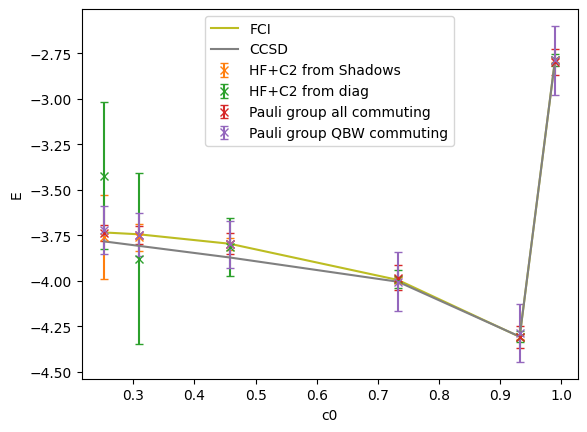

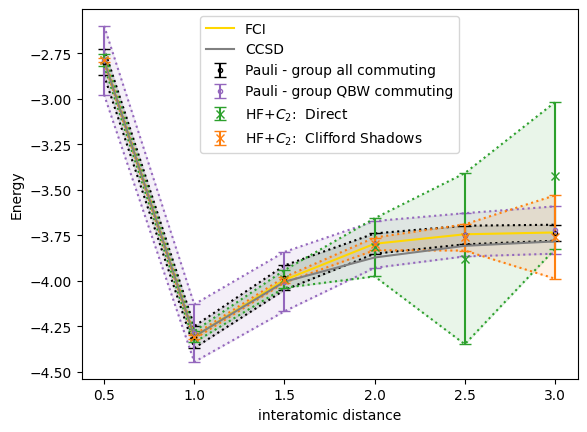

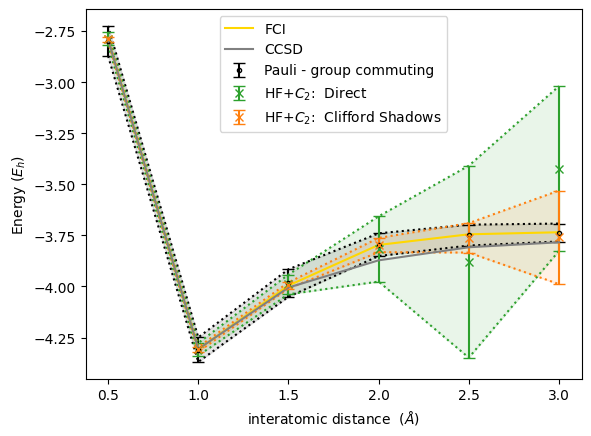

In [2]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","1.0","1.5","2.0","2.5","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_8_nshots_10000.0_d_"+U_str+".dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_8_nshots_10000.0_d_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

96
85
78
80
78
87
74
81
79
76
69


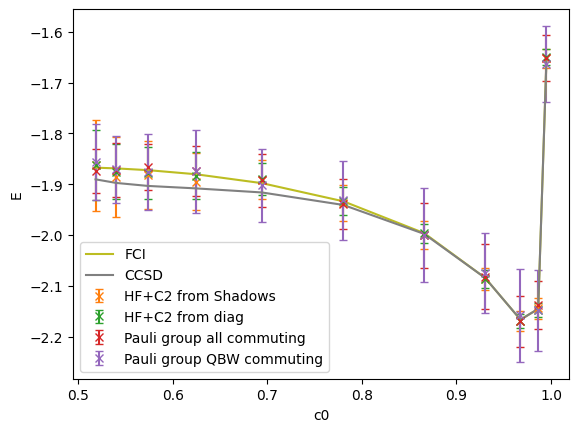

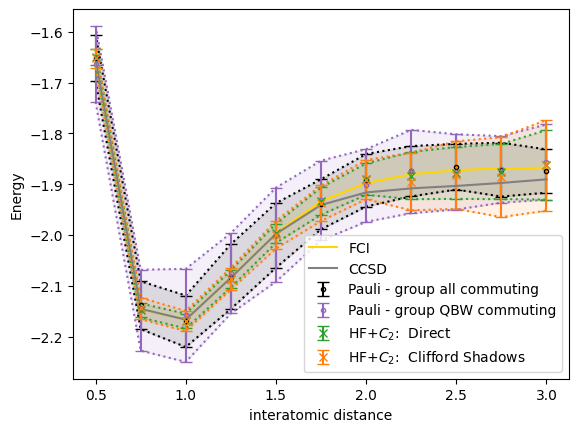

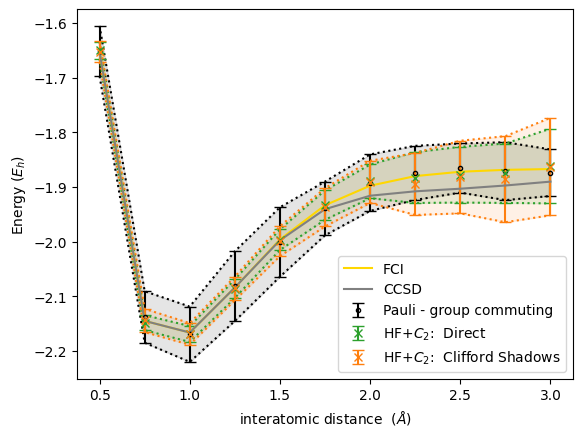

In [13]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25","2.5","2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_4_nshots_1000_d_"+U_str+".dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_4_nshots_1000_d_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

99
55
52
39
48
41
49
53
56
45
58


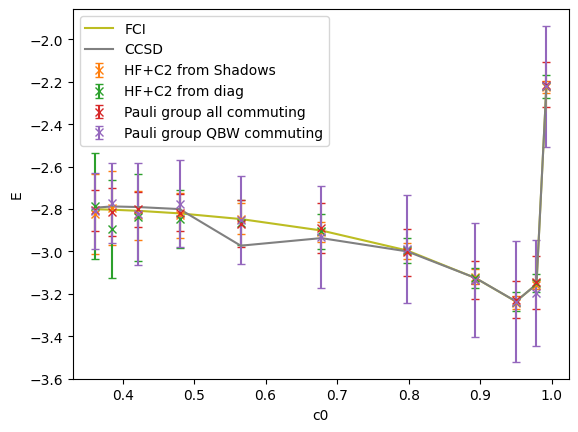

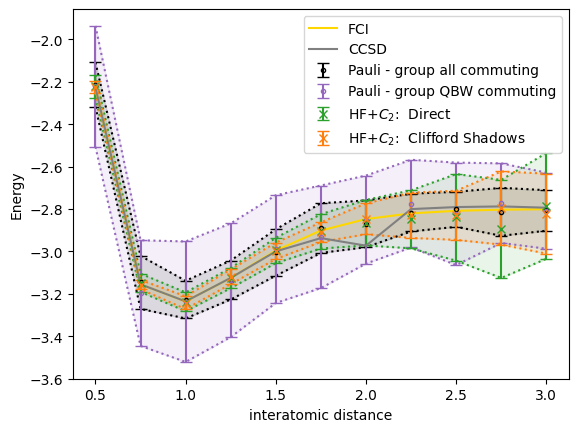

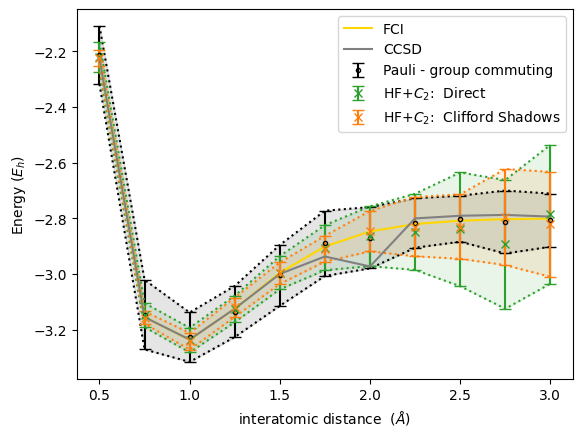

In [14]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25","2.5","2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_6_nshots_1000_d_"+U_str+".dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_6_nshots_1000_d_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

100
100
100
100
100
100
100
100
100


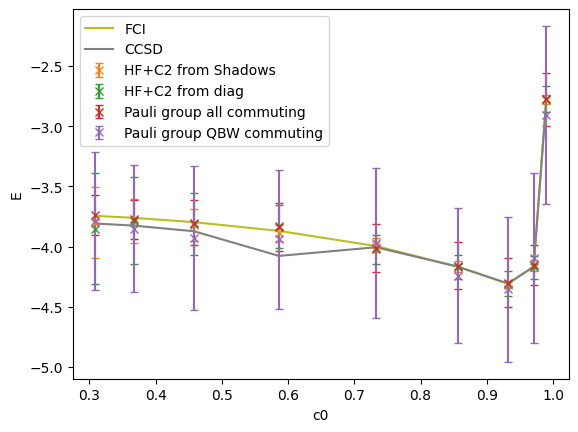

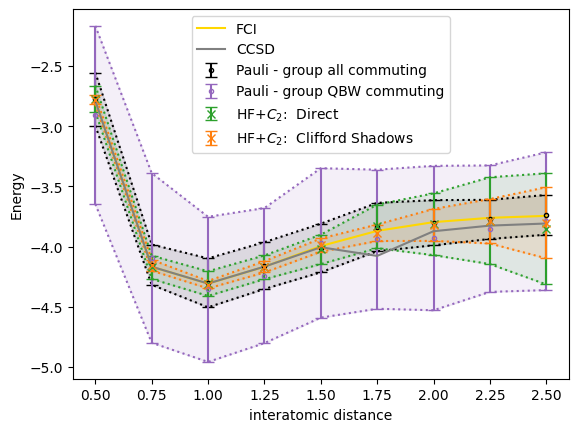

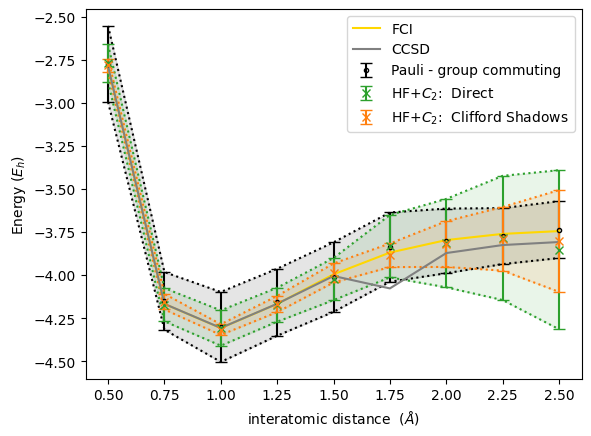

In [19]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25","2.5"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_8_nshots_1000_d_"+U_str+".dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_8_nshots_1000_d_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list,ccsd_list,c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.1)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.1)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.1)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.1)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

198
177
175
172
172
166
194
177


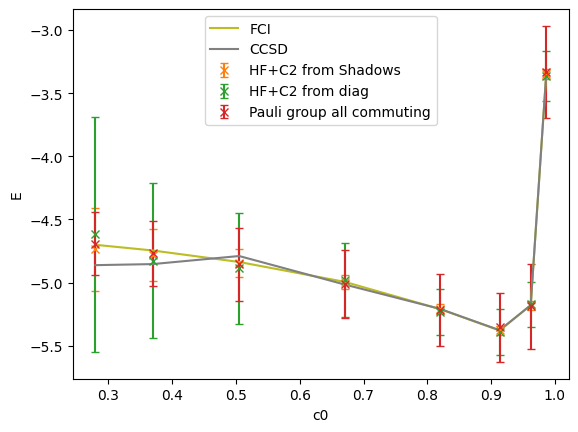

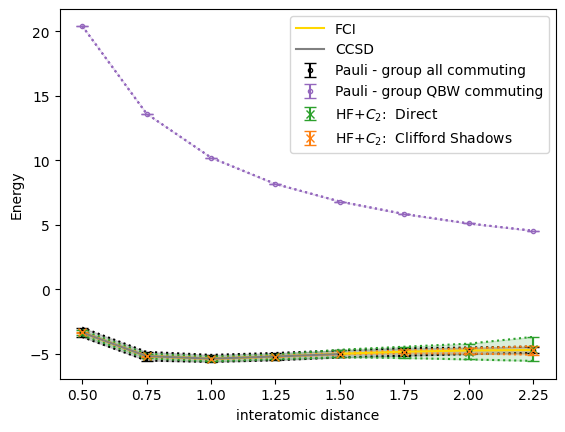

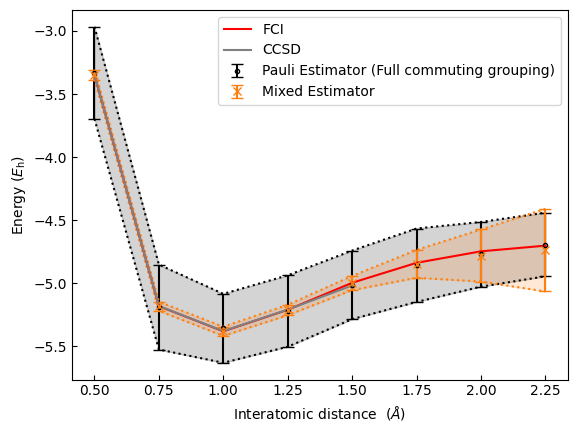

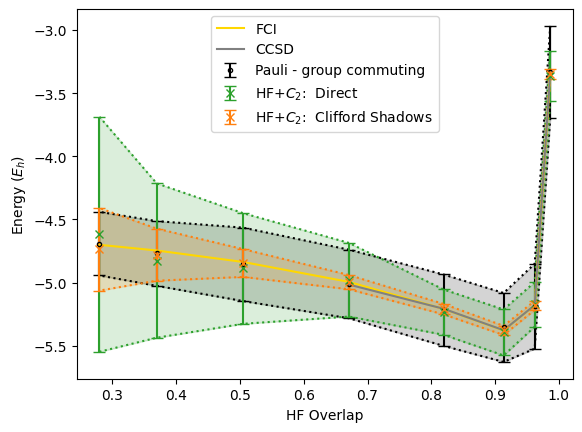

In [1]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_10_nshots_1000_d_"+U_str+".dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_10_nshots_1000_d_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli Estimator (Full commuting grouping)")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
# plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="Mixed Estimator")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="red",ls="-",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",ls="-",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
# plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("Interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_\mathrm{h}$)")
plt.legend()

plt.tick_params(direction="in")

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots_no_direct_2.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")


# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")


plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")

plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

In [6]:
for n in range(len(hf_cs_err_list)):
    print((pauli_all_err_list[n]/hf_cs_err_list[n]))
print(c0_list)

9.2074019587776
9.27689389411065
7.529632778591939
6.826389495785529
4.816360668915376
2.640110258466355
1.2413367765930656
0.7701529217054461
[0.9865235886147572, 0.9621592996588519, 0.9134578867247264, 0.8192321333031952, 0.6710374288676925, 0.5049918269813286, 0.3692872095657922, 0.27944815159894576]


ValueError: x and y must have same first dimension, but have shapes (6,) and (8,)

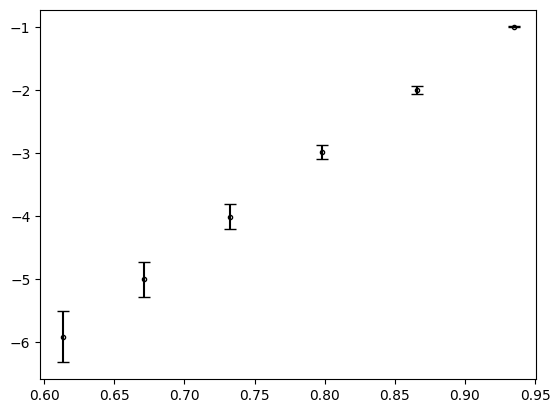

In [36]:
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Exp Val: group all commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")


# # plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# # plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# # plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")


# plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="Mixed Estimator"+":  Direct")
# plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
# plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")

# plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="Mixed Estimator"+":  Clifford Shadows")
# plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")


# # plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# # plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# # plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
# plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
# plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots_fci_ccsd_paulis.png",bbox_inches="tight",dpi=500)

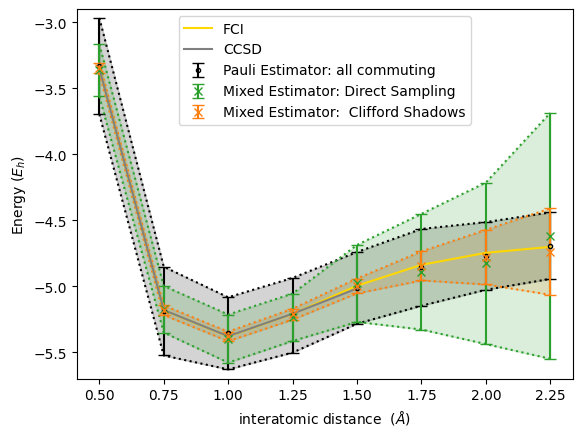

In [58]:
plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli Estimator: all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")


plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="Mixed Estimator"+": Direct Sampling")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")


plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="Mixed Estimator"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)

# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 


plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)




plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.ylim(-5.7,-2.9)
plt.legend()

plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots_fci_ccsd_pauli_direct_CS.png",bbox_inches="tight",dpi=500)

In [3]:
print(ccsd_list)

[-2.788992918450784, -4.1668294010650255, -4.306498896299033, -4.166222009057011, -4.005140145674757, -4.077137397538945, -3.872076785553121, -3.8255523669793834, -3.8080760010841175, -3.7837017790897693]


100
101
100
100
172
40


Text(0.815, 0.35, 'interatomic distance $=1.5$')

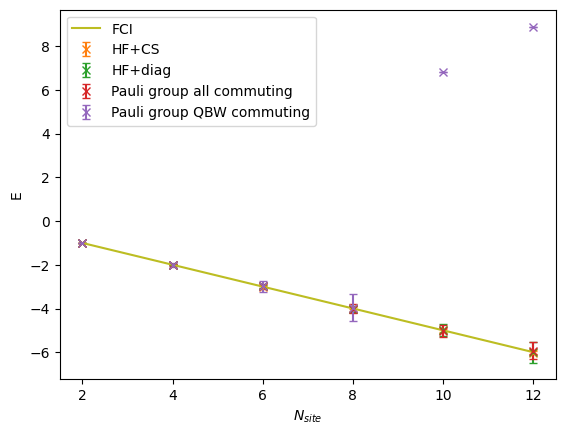

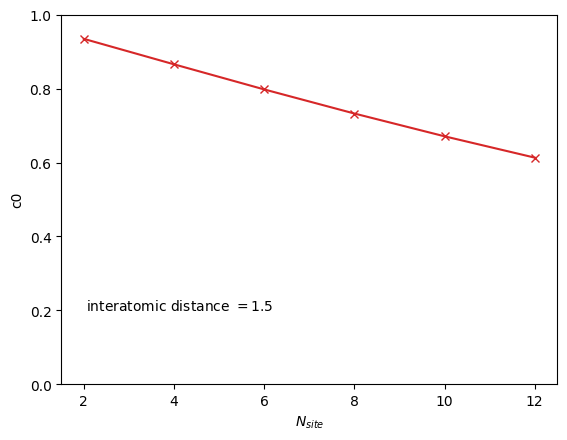

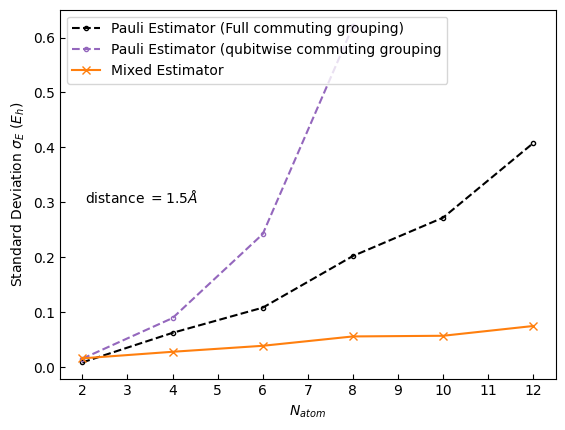

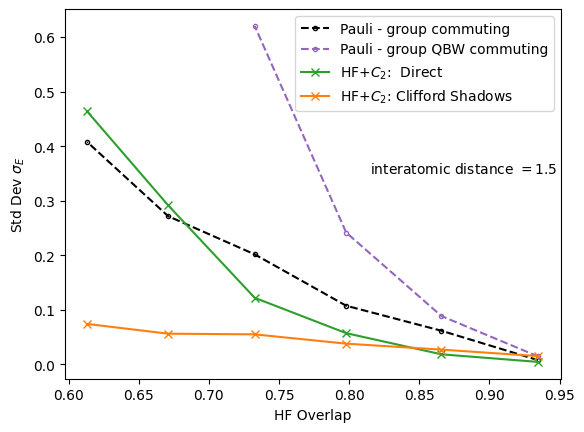

In [5]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
from matplotlib import ticker
data_files_list=["2","4","6","8","10"]#,"16.0"]
data_files_list_2=["12"]
c0_list=[]
fci_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list_2:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_CCSD_conv_check_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
    print(len(data["c0"]))    

for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

for U_str in data_files_list_2:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_CCSD_conv_check_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)    
# plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
# plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
# plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# # plt.plot(c0_list,hf_list,c="C7",label="HF")   
# plt.plot(c0_list,fci_list,c="C8",label="FCI")   
# plt.xlabel("c0")
# plt.ylabel("E")
# plt.legend()
# #plt.ylim(-0.1,1.0)
# #plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
# plt.figure()

U_list=[float(x) for x in data_files_list]+[float(x) for x in data_files_list_2]
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("E")
plt.legend()

plt.figure()

U_list=[float(x) for x in data_files_list]+[float(x) for x in data_files_list_2]
plt.plot(U_list,c0_list,marker="x",c="C3")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("c0")
plt.ylim(0.,1.0)
plt.text(2.05,0.2,r"interatomic distance $=1.5$")
plt.figure()


U_list=[int(x) for x in data_files_list]+[float(x) for x in data_files_list_2]
plt.plot(U_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli Estimator (Full commuting grouping)")
plt.plot(U_list[:-2],pauli_qbw_err_list[:-2],c="C4",marker=".",mfc="none",ls="--",label="Pauli Estimator (qubitwise commuting grouping")

# plt.plot(U_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="Mixed Estimator"+": Direct Sampling")
plt.plot(U_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="Mixed Estimator")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{atom}$")
plt.ylabel(r"Standard Deviation $\sigma_E$ ($E_h$)")
plt.legend(loc = "upper left")
plt.text(2.05,0.3,r"distance $=1.5\AA$")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))
plt.tick_params(direction="in")
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_natom_vs_Eerr_Hyd1d_d15_300shots.png",bbox_inches="tight",dpi=500)
plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_natom_vs_Eerr_Hyd1d_d15_1e3shots_paulis_CS_ylabel3.png",bbox_inches="tight",dpi=500)
plt.figure()


U_list=[int(x) for x in data_files_list]+[float(x) for x in data_files_list_2]
plt.plot(c0_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli - group commuting")
plt.plot(c0_list[:-2],pauli_qbw_err_list[:-2],c="C4",marker=".",mfc="none",ls="--",label="Pauli - group QBW commuting")

plt.plot(c0_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+": Clifford Shadows")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"HF Overlap")
plt.ylabel(r"Std Dev $\sigma_E$")
plt.legend()
plt.text(0.815,0.35,r"interatomic distance $=1.5$")
# ax=plt.gca()
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
# plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))

100
101
100
100
194


Text(0.815, 0.35, 'interatomic distance $=2.0$')

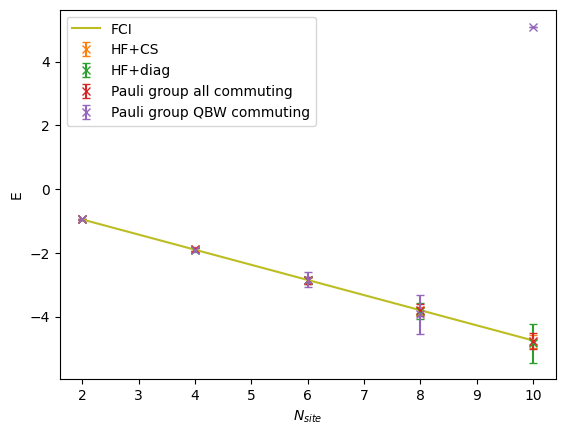

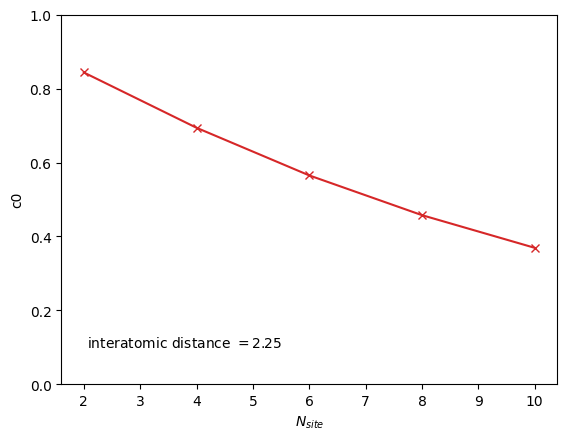

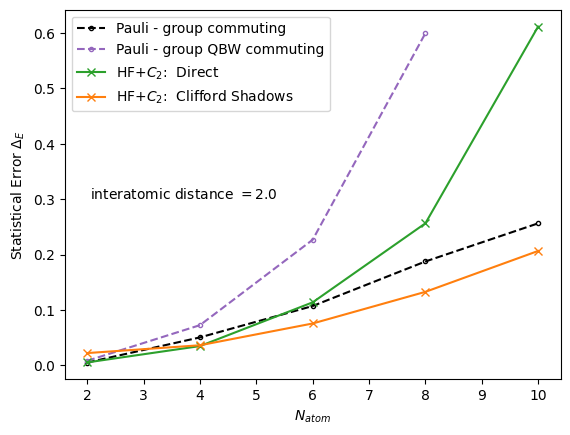

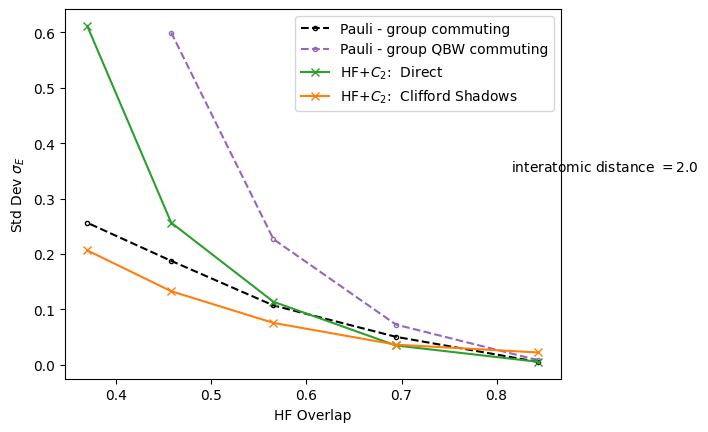

In [3]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
from matplotlib import ticker
data_files_list=["2","4","6","8","10"]#,"16.0"]
c0_list=[]
fci_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_"+U_str+"_nshots_1000_d_2.0.dat", sep="\s+")
    print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("results_comp_Hydrogen1D_dmrg_nsite_"+U_str+"_nshots_1000_d_2.0.dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    hf_mean=((data["e_hf"])).mean()

    hf_cs_mean=((data["HF+CS"])).mean()
    hf_cs_std=((data["HF+CS"])).std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
# plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
# plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
# plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# # plt.plot(c0_list,hf_list,c="C7",label="HF")   
# plt.plot(c0_list,fci_list,c="C8",label="FCI")   
# plt.xlabel("c0")
# plt.ylabel("E")
# plt.legend()
# #plt.ylim(-0.1,1.0)
# #plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
# plt.figure()

U_list=[float(x) for x in data_files_list]
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("E")
plt.legend()
plt.figure()

U_list=[float(x) for x in data_files_list]
plt.plot(U_list,c0_list,marker="x",c="C3")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("c0")
plt.ylim(0.,1.0)
plt.text(2.05,0.1,r"interatomic distance $=2.25$")
plt.figure()


U_list=[int(x) for x in data_files_list]
plt.plot(U_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli - group commuting")
plt.plot(U_list[:-1],pauli_qbw_err_list[:-1],c="C4",marker=".",mfc="none",ls="--",label="Pauli - group QBW commuting")

plt.plot(U_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Clifford Shadows")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{atom}$")
plt.ylabel(r"Statistical Error $\Delta_E$")
plt.legend()
plt.text(2.05,0.3,r"interatomic distance $=2.0$")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_natom_vs_Eerr_Hyd1d_d2_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()


U_list=[int(x) for x in data_files_list]
plt.plot(c0_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli - group commuting")
plt.plot(c0_list[:-1],pauli_qbw_err_list[:-1],c="C4",marker=".",mfc="none",ls="--",label="Pauli - group QBW commuting")

plt.plot(c0_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Clifford Shadows")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"HF Overlap")
plt.ylabel(r"Std Dev $\sigma_E$")
plt.legend()
plt.text(0.815,0.35,r"interatomic distance $=2.0$")

Text(2.0, -2.5, 'interatomic distance $=1.0\\AA$')

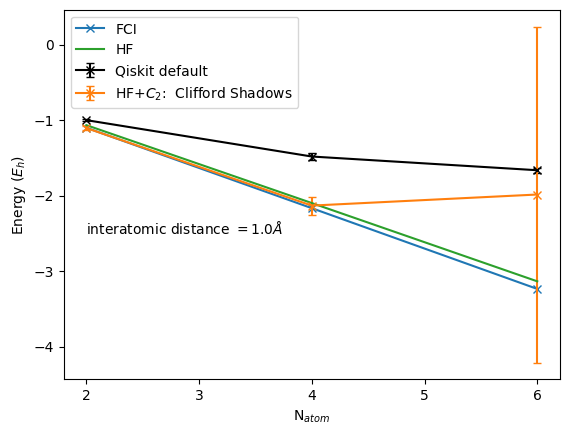

In [11]:
from matplotlib import ticker

data_files_list=["2","4","6"]
c0_list=[]
fci_list=[]
CS_list=[]
CS_err_list=[]
ibm_list=[]
ibm_err_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_device_noise_Hydrogen_chain_a_1.0_Nshots_1000_natom_"+U_str+".dat", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    data["E_cs"]=data["E_cs"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    cs_mean= data["E_cs"].mean() 
    cs_std=data["E_cs"].std() 
    ibm_mean=data["E_ibm"].mean()
    ibm_std=data["E_ibm"].std()


    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    CS_list.append(cs_mean)
    CS_err_list.append(cs_std)
    ibm_list.append(ibm_mean)
    ibm_err_list.append(ibm_std)
hf_list=[-1.0661086493179366,-2.0985459369977173,-3.1355322139663215]
U_list=[int(x) for x in data_files_list[:]]
plt.plot(U_list,fci_list[:],marker="x",label="FCI")    
plt.errorbar(U_list,ibm_list[:],ibm_err_list[:],marker="x",color="black",capsize=3.,label="Qiskit default")
plt.errorbar(U_list,CS_list[:],CS_err_list[:],marker="x",capsize=3.,label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_list[:],label="HF")

plt.xlabel(r"N$_{atom}$")
plt.ylabel(r"Energy ($E_h$)")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))
plt.legend()
plt.text(2.,-2.5,r"interatomic distance $=1.0\AA$")

[0.9845135957447353, 0.9677106139405339, 0.9500490298220011]


Text(2.0, -2.5, 'interatomic distance $=1.0\\AA$')

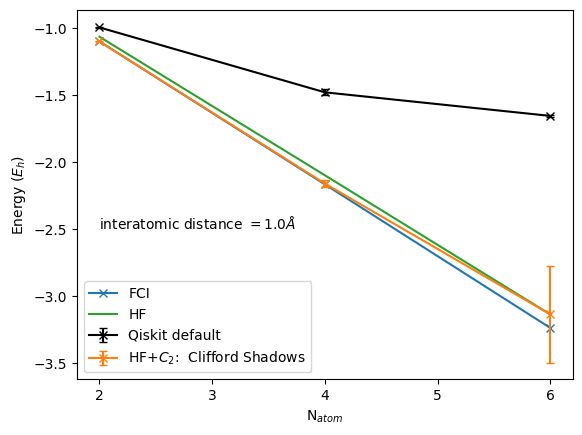

In [5]:
from matplotlib import ticker
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_files_list=["2","4","6"]
c0_list=[]
fci_list=[]
CS_list=[]
CS_err_list=[]
ibm_list=[]
ibm_err_list=[]
for U_str in data_files_list:
    data = pd.read_csv("results_comp_device_noise_Hydrogen_chain_a_1.0_Nshots_40000_natom_"+U_str+".dat2", sep="\s+")
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    data["E_cs"]=data["E_cs"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    cs_mean= data["E_cs"].mean() 
    cs_std=data["E_cs"].std() 
    ibm_mean=data["E_ibm"].mean()
    ibm_std=data["E_ibm"].std()


    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    CS_list.append(cs_mean)
    CS_err_list.append(cs_std)
    ibm_list.append(ibm_mean)
    ibm_err_list.append(ibm_std)
hf_list=[-1.0661086493179366,-2.0985459369977173,-3.1355322139663215]
U_list=[int(x) for x in data_files_list[:]]
print(c0_list)
plt.plot(U_list,fci_list[:],marker="x",label="FCI")    
plt.errorbar(U_list,ibm_list[:],ibm_err_list[:],marker="x",color="black",capsize=3.,label="Qiskit default")
plt.errorbar(U_list,CS_list[:],CS_err_list[:],marker="x",capsize=3.,label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_list[:],label="HF")

plt.xlabel(r"N$_{atom}$")
plt.ylabel(r"Energy ($E_h$)")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))
plt.legend()
plt.text(2.,-2.5,r"interatomic distance $=1.0\AA$")

In [26]:
import qiskit
import qiskit.quantum_info
import numpy as np

def to_matrix(alist, n,m):
    return [alist[i:i+n] for i in range(0, n*m, n)]

clifford_list=[]
p=3
arr_length = 10
for m in range(p):
    cliff_list_internal=[]
    for n in range(arr_length):
        cliff_list_internal.append(qiskit.quantum_info.random_clifford(10))
    clifford_list.append(cliff_list_internal)    

print(len(clifford_list))    
# clifford_list_res = np.empty(30,dtype=object)
# clifford_list = np.array(clifford_list,dtype=object)
# np.reshape(clifford_list,1,-1)
flat_list = [
    x
    for xs in clifford_list
    for x in xs
]
print(len(flat_list))

flat_list2= [cliff_list_internal.append(qiskit.quantum_info.random_clifford(10)) for x in range(31)]
print(len(flat_list2)//3)

non_flat_list=to_matrix(flat_list2,len(flat_list2)//3,3)
print(len(non_flat_list),len(non_flat_list[0]),len(non_flat_list[1]))

3
30
10
3 10 10
